Placement Training

MiniProject-4


##PandemicPulse-(Part-1)##

Charan Balaji

21BTRCL027



In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
df = pd.read_csv(url)

print(df.info())
print(df.head())
print(df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB
None
         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-23  Afghanistan          0          0       0
2  2020-01-24  Afghanistan          0          0       0
3  2020-01-25  Afghanistan          0          0       0
4  2020-01-26  Afghanistan          0          0       0
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column    

In [ ]:
print(df.describe())
print(df.info())
print(df.head())
print(df.describe())

                                Date     Confirmed     Recovered  \
count                         161568  1.615680e+05  1.615680e+05   
mean   2021-03-04 11:59:59.999999232  7.361569e+05  1.453967e+05   
min              2020-01-22 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-08-12 18:00:00  1.220000e+03  0.000000e+00   
50%              2021-03-04 12:00:00  2.369200e+04  1.260000e+02   
75%              2021-09-24 06:00:00  2.558420e+05  1.797225e+04   
max              2022-04-16 00:00:00  8.062512e+07  3.097475e+07   
std                              NaN  3.578884e+06  9.748275e+05   

              Deaths  
count  161568.000000  
mean    13999.436089  
min         0.000000  
25%        17.000000  
50%       365.000000  
75%      4509.000000  
max    988609.000000  
std     59113.581271  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     ------

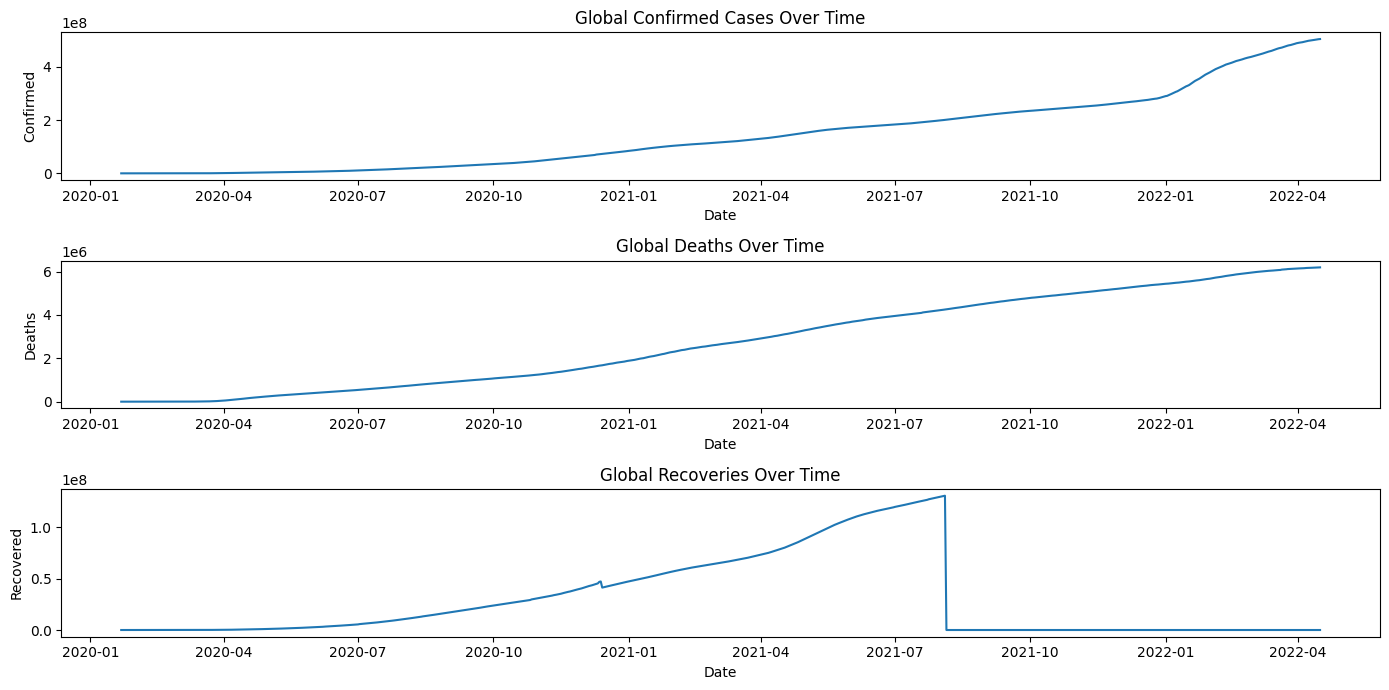

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

global_data = df.groupby('Date').sum().reset_index()

plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
sns.lineplot(x='Date', y='Confirmed', data=global_data)
plt.title('Global Confirmed Cases Over Time')

plt.subplot(3, 1, 2)
sns.lineplot(x='Date', y='Deaths', data=global_data)
plt.title('Global Deaths Over Time')

plt.subplot(3, 1, 3)
sns.lineplot(x='Date', y='Recovered', data=global_data)
plt.title('Global Recoveries Over Time')

plt.tight_layout()
plt.show()


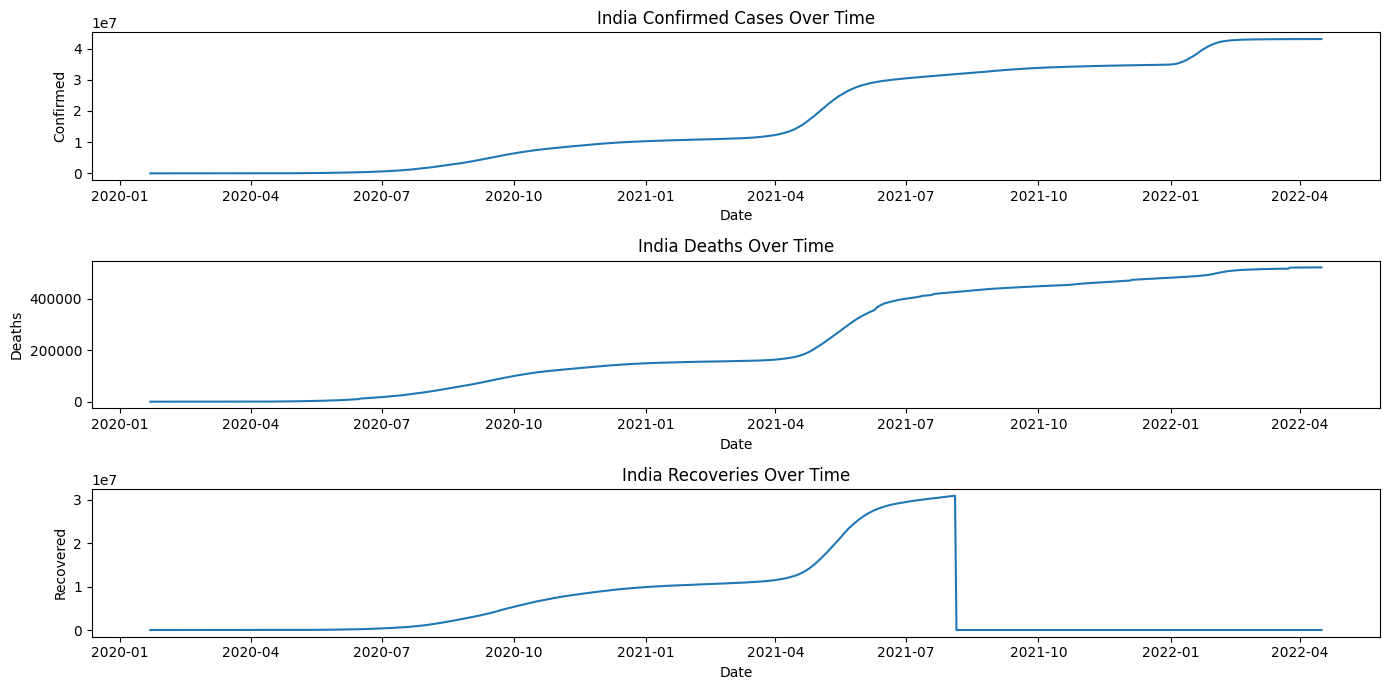

In [ ]:
def plot_country_data(country):
    country_data = df[df['Country'] == country]

    plt.figure(figsize=(14, 7))

    plt.subplot(3, 1, 1)
    sns.lineplot(x='Date', y='Confirmed', data=country_data)
    plt.title(f'{country} Confirmed Cases Over Time')

    plt.subplot(3, 1, 2)
    sns.lineplot(x='Date', y='Deaths', data=country_data)
    plt.title(f'{country} Deaths Over Time')

    plt.subplot(3, 1, 3)
    sns.lineplot(x='Date', y='Recovered', data=country_data)
    plt.title(f'{country} Recoveries Over Time')

    plt.tight_layout()
    plt.show()

plot_country_data('India')


<ipython-input-5-5bf53c8427b6>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country', y='Confirmed', data=top_countries_data, estimator=sum, ci=None)


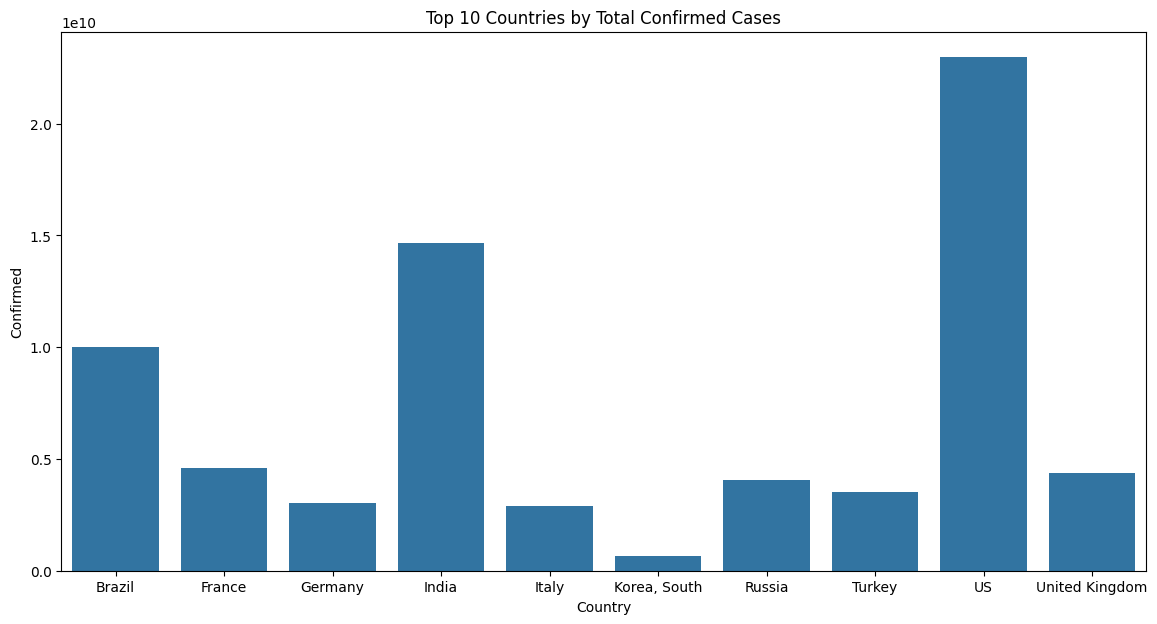

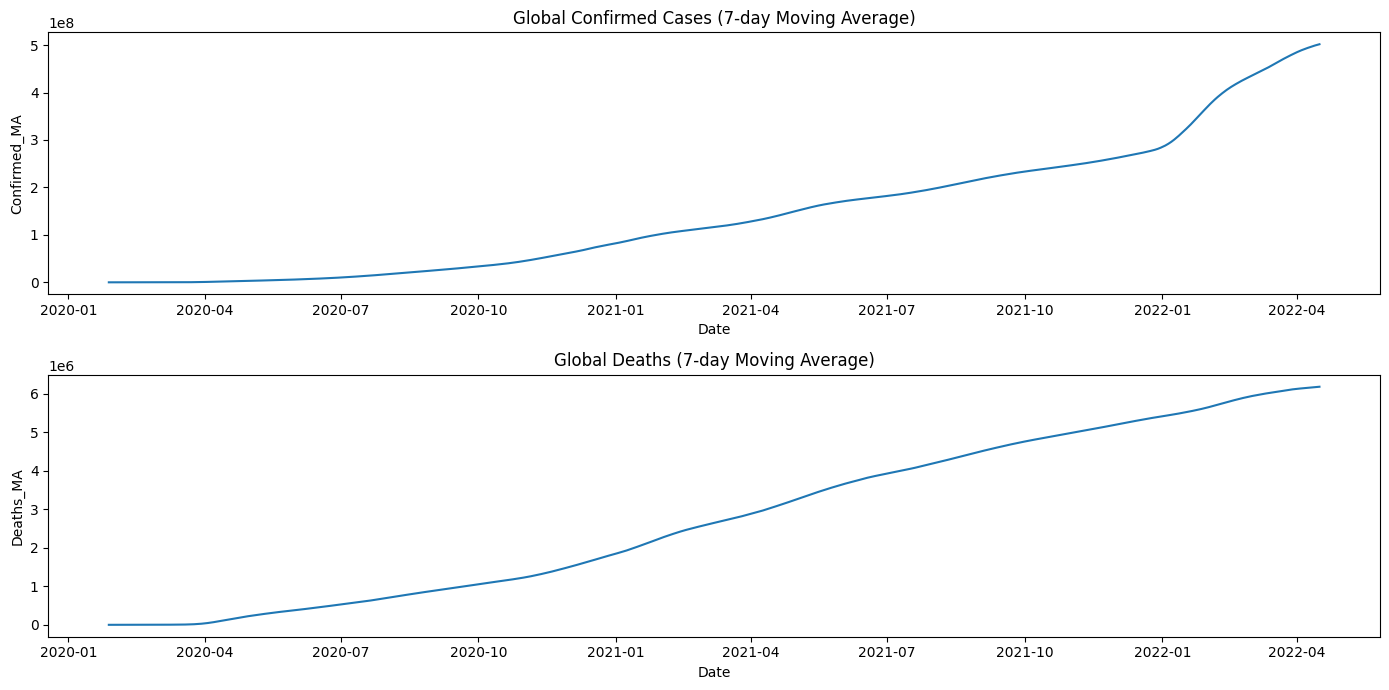

In [ ]:
top_countries = df.groupby('Country').max().sort_values(by='Confirmed', ascending=False).head(10).index

top_countries_data = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Confirmed', data=top_countries_data, estimator=sum, ci=None)
plt.title('Top 10 Countries by Total Confirmed Cases')
plt.show()

global_data['Confirmed_MA'] = global_data['Confirmed'].rolling(window=7).mean()
global_data['Deaths_MA'] = global_data['Deaths'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
sns.lineplot(x='Date', y='Confirmed_MA', data=global_data)
plt.title('Global Confirmed Cases (7-day Moving Average)')

plt.subplot(2, 1, 2)
sns.lineplot(x='Date', y='Deaths_MA', data=global_data)
plt.title('Global Deaths (7-day Moving Average)')

plt.tight_layout()
plt.show()


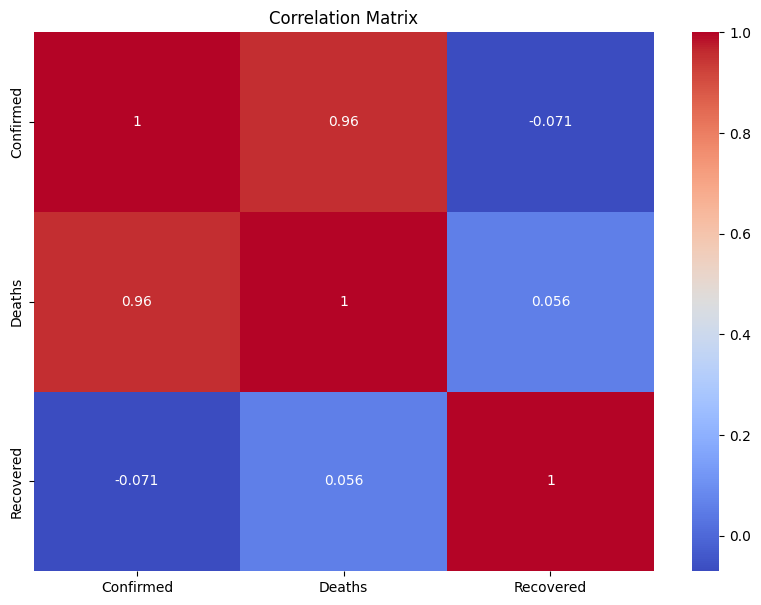

In [ ]:
correlation_matrix = global_data[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##PandemicPulse-(Part-2)##

1. What is the trend of confirmed cases, deaths, and recoveries globally over time? Draw
plots separately

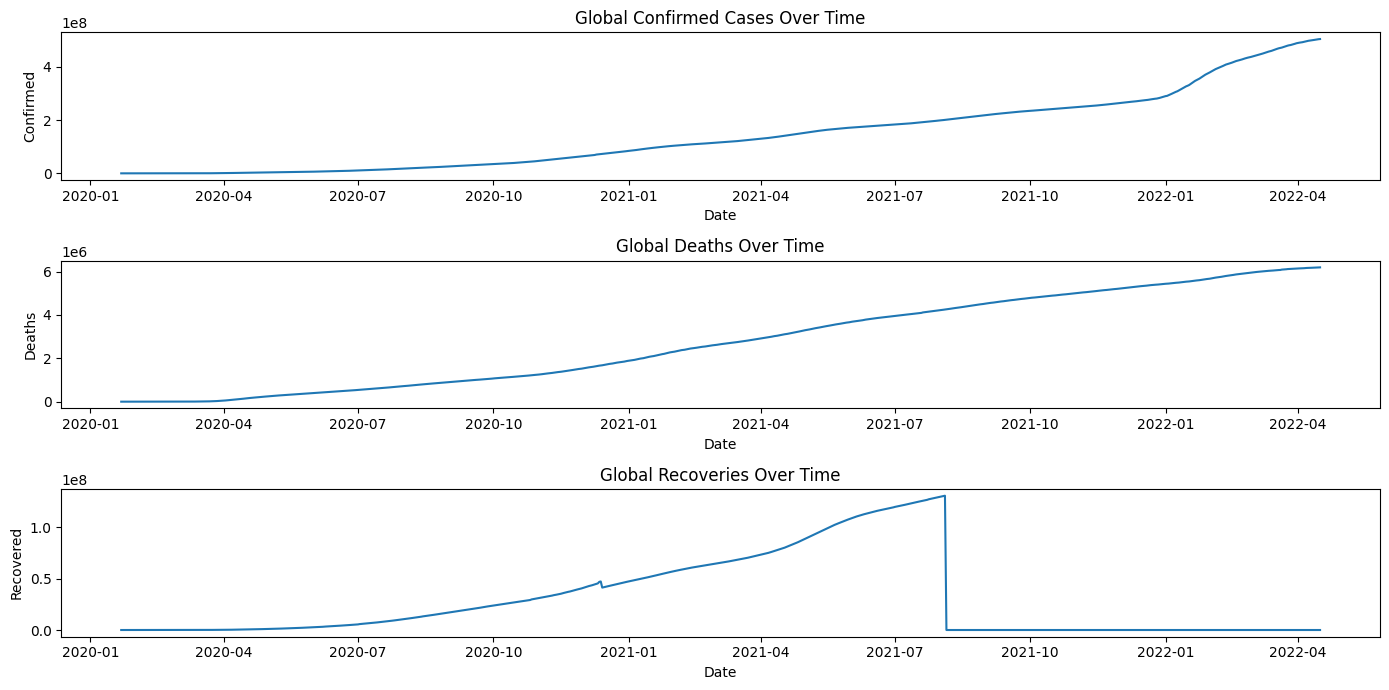

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
sns.lineplot(x='Date', y='Confirmed', data=global_data)
plt.title('Global Confirmed Cases Over Time')

plt.subplot(3, 1, 2)
sns.lineplot(x='Date', y='Deaths', data=global_data)
plt.title('Global Deaths Over Time')

plt.subplot(3, 1, 3)
sns.lineplot(x='Date', y='Recovered', data=global_data)
plt.title('Global Recoveries Over Time')

plt.tight_layout()
plt.show()

2. Which country has the highest number of confirmed cases, deaths, and recoveries as
of the latest date in the dataset?

In [ ]:
latest_data = df[df['Date'] == df['Date'].max()]

max_confirmed = latest_data.loc[latest_data['Confirmed'].idxmax()]
max_deaths = latest_data.loc[latest_data['Deaths'].idxmax()]
max_recovered = latest_data.loc[latest_data['Recovered'].idxmax()]

print(f"Highest Confirmed Cases: {max_confirmed['Country']} ({max_confirmed['Confirmed']})")
print(f"Highest Deaths: {max_deaths['Country']} ({max_deaths['Deaths']})")
print(f"Highest Recoveries: {max_recovered['Country']} ({max_recovered['Recovered']})")

Highest Confirmed Cases: US (80625120)
Highest Deaths: US (988609)
Highest Recoveries: Afghanistan (0)


3. How do the trends of confirmed cases differ between the top 5 most affected
countries?

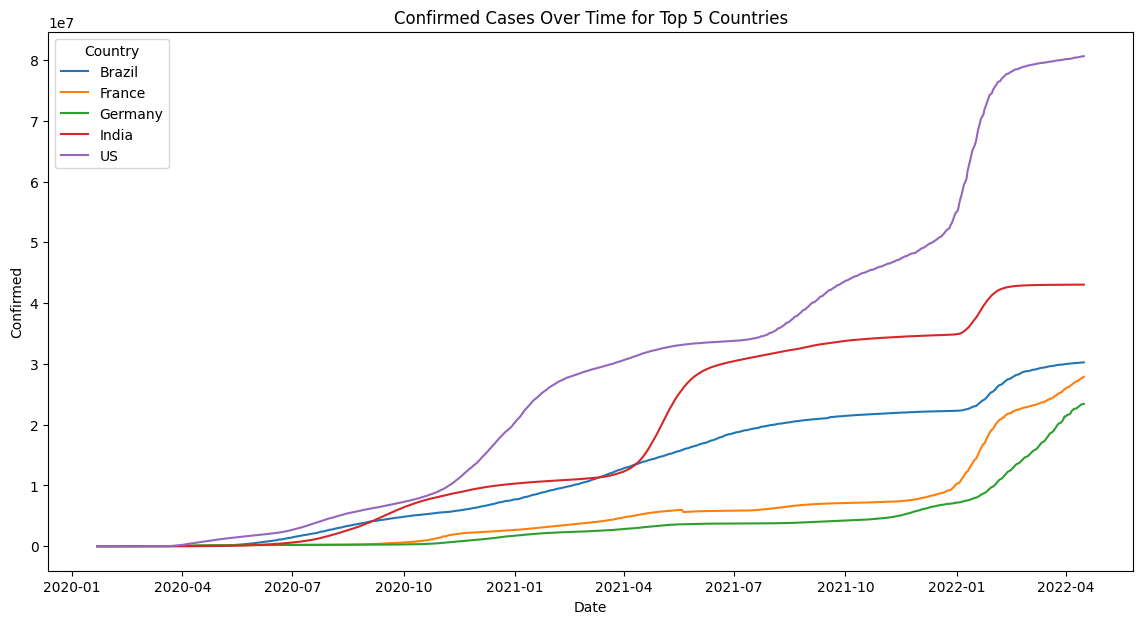

In [ ]:
top_5_countries = df.groupby('Country').max().sort_values(by='Confirmed', ascending=False).head(5).index
top_5_data = df[df['Country'].isin(top_5_countries)]

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Confirmed', hue='Country', data=top_5_data)
plt.title('Confirmed Cases Over Time for Top 5 Countries')
plt.show()

4. What is the growth rate of confirmed cases, deaths, and recoveries globally

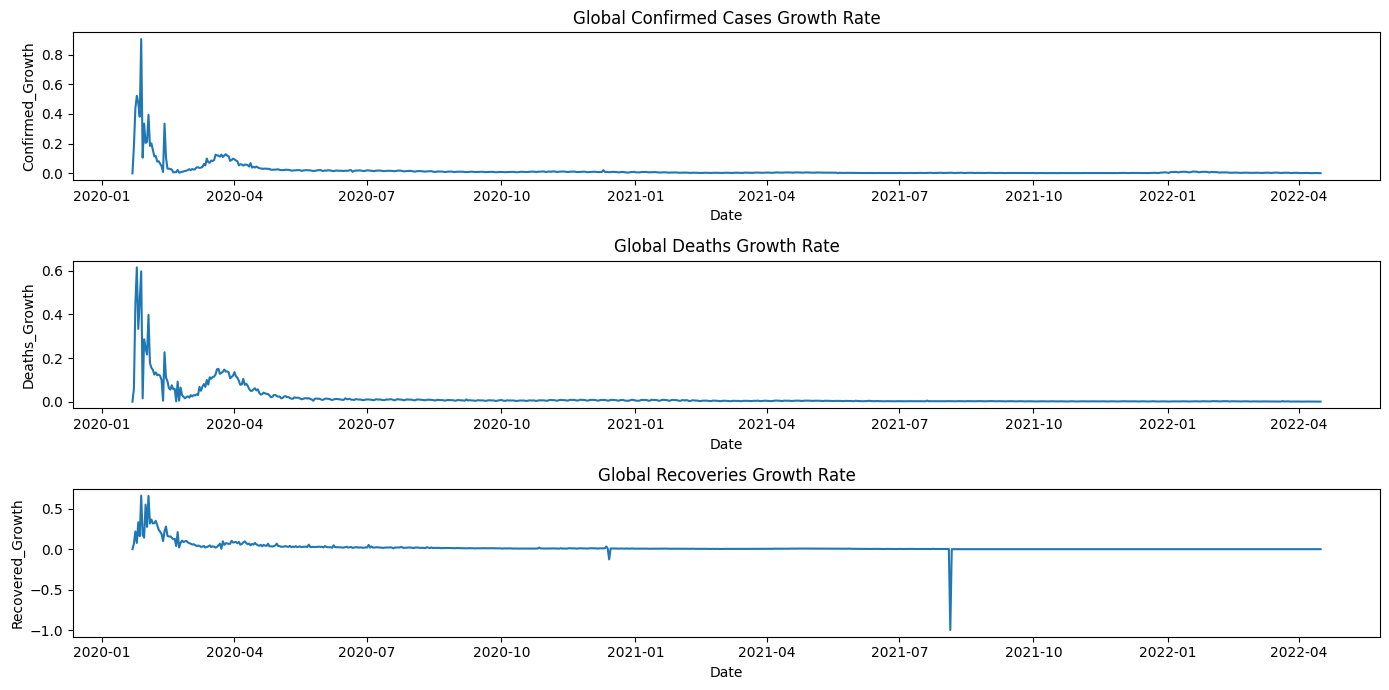

In [ ]:
global_data['Confirmed_Growth'] = global_data['Confirmed'].pct_change().fillna(0)
global_data['Deaths_Growth'] = global_data['Deaths'].pct_change().fillna(0)
global_data['Recovered_Growth'] = global_data['Recovered'].pct_change().fillna(0)

plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
sns.lineplot(x='Date', y='Confirmed_Growth', data=global_data)
plt.title('Global Confirmed Cases Growth Rate')

plt.subplot(3, 1, 2)
sns.lineplot(x='Date', y='Deaths_Growth', data=global_data)
plt.title('Global Deaths Growth Rate')

plt.subplot(3, 1, 3)
sns.lineplot(x='Date', y='Recovered_Growth', data=global_data)
plt.title('Global Recoveries Growth Rate')

plt.tight_layout()
plt.show()

5. What are the cumulative confirmed cases, deaths, and recoveries for the top 10 most
affected countries?

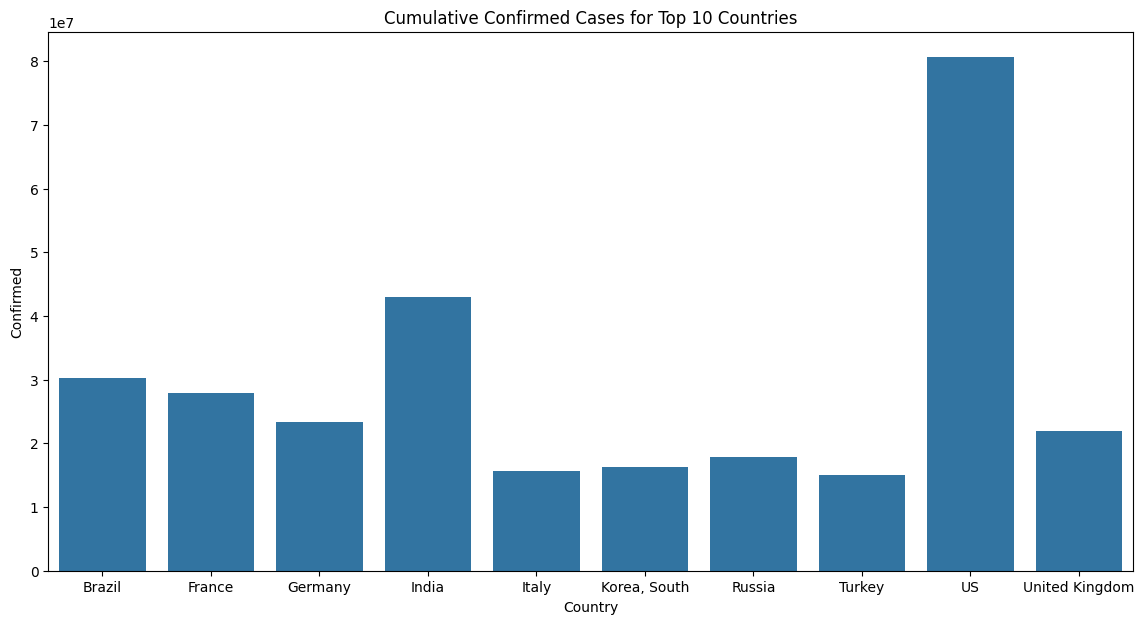

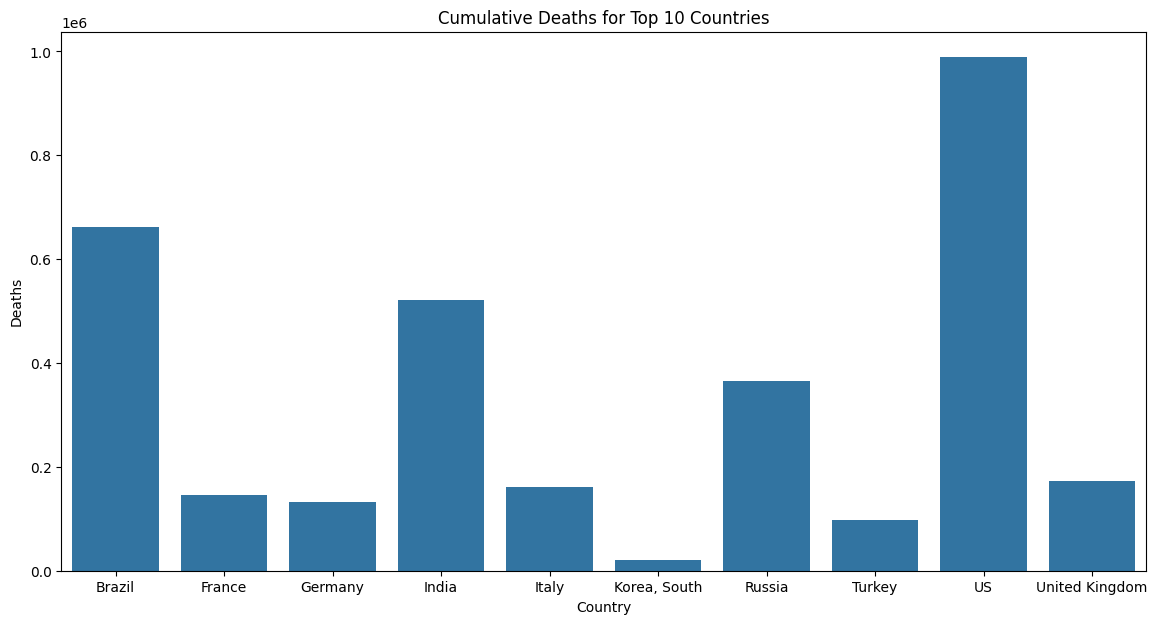

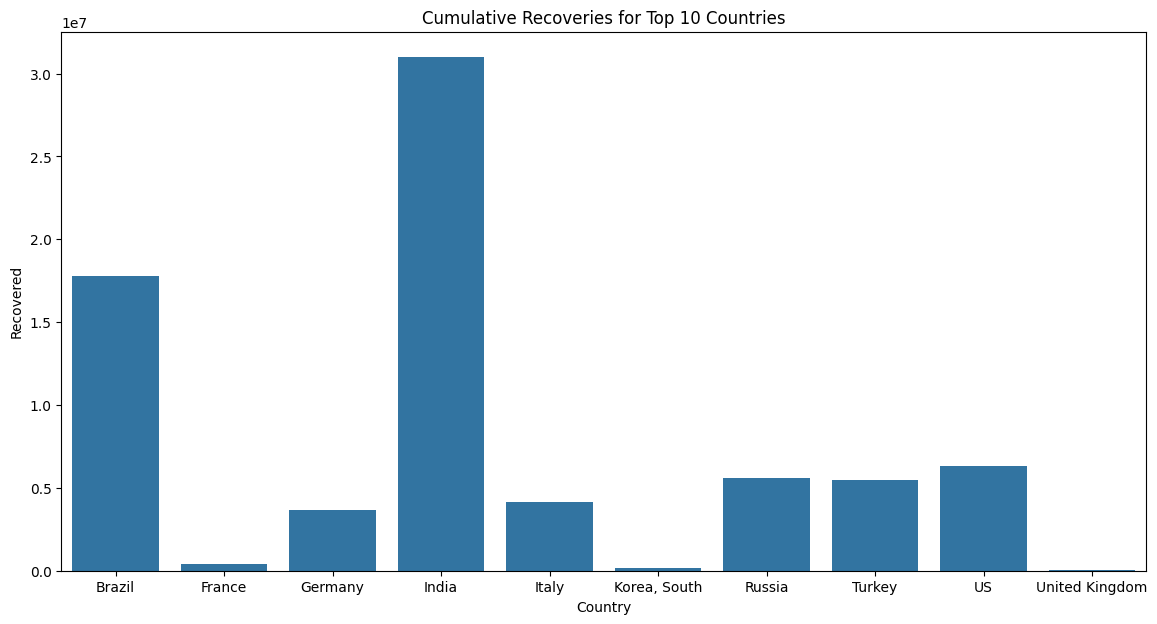

In [ ]:
top_10_countries = df.groupby('Country').max().sort_values(by='Confirmed', ascending=False).head(10).index
top_10_data = df[df['Country'].isin(top_10_countries)]

cumulative_data = top_10_data.groupby('Country').max().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Confirmed', data=cumulative_data)
plt.title('Cumulative Confirmed Cases for Top 10 Countries')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Deaths', data=cumulative_data)
plt.title('Cumulative Deaths for Top 10 Countries')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Recovered', data=cumulative_data)
plt.title('Cumulative Recoveries for Top 10 Countries')
plt.show()

6. How does the recovery rate compare across different countries?

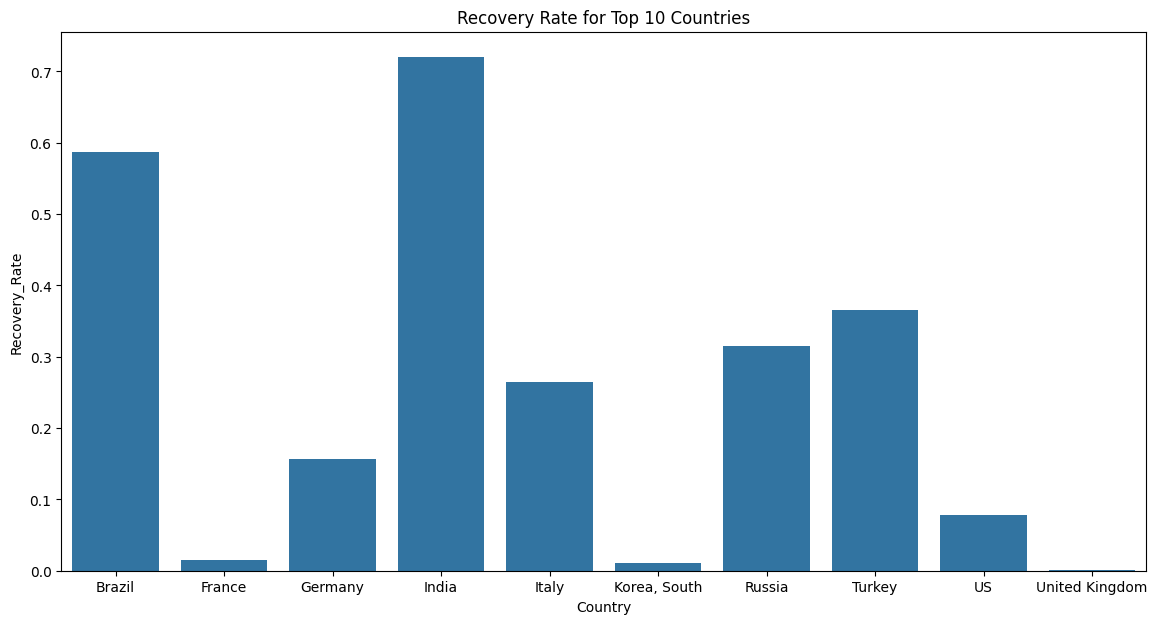

In [ ]:
cumulative_data['Recovery_Rate'] = cumulative_data['Recovered'] / cumulative_data['Confirmed']

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Recovery_Rate', data=cumulative_data)
plt.title('Recovery Rate for Top 10 Countries')
plt.show()

7. What is the correlation between confirmed cases, deaths, and recoveries globally?


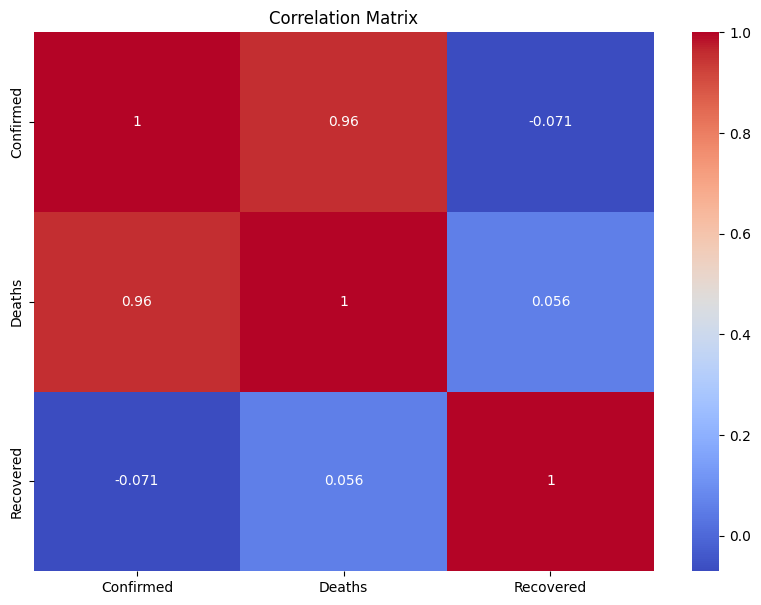

In [ ]:
correlation_matrix = global_data[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

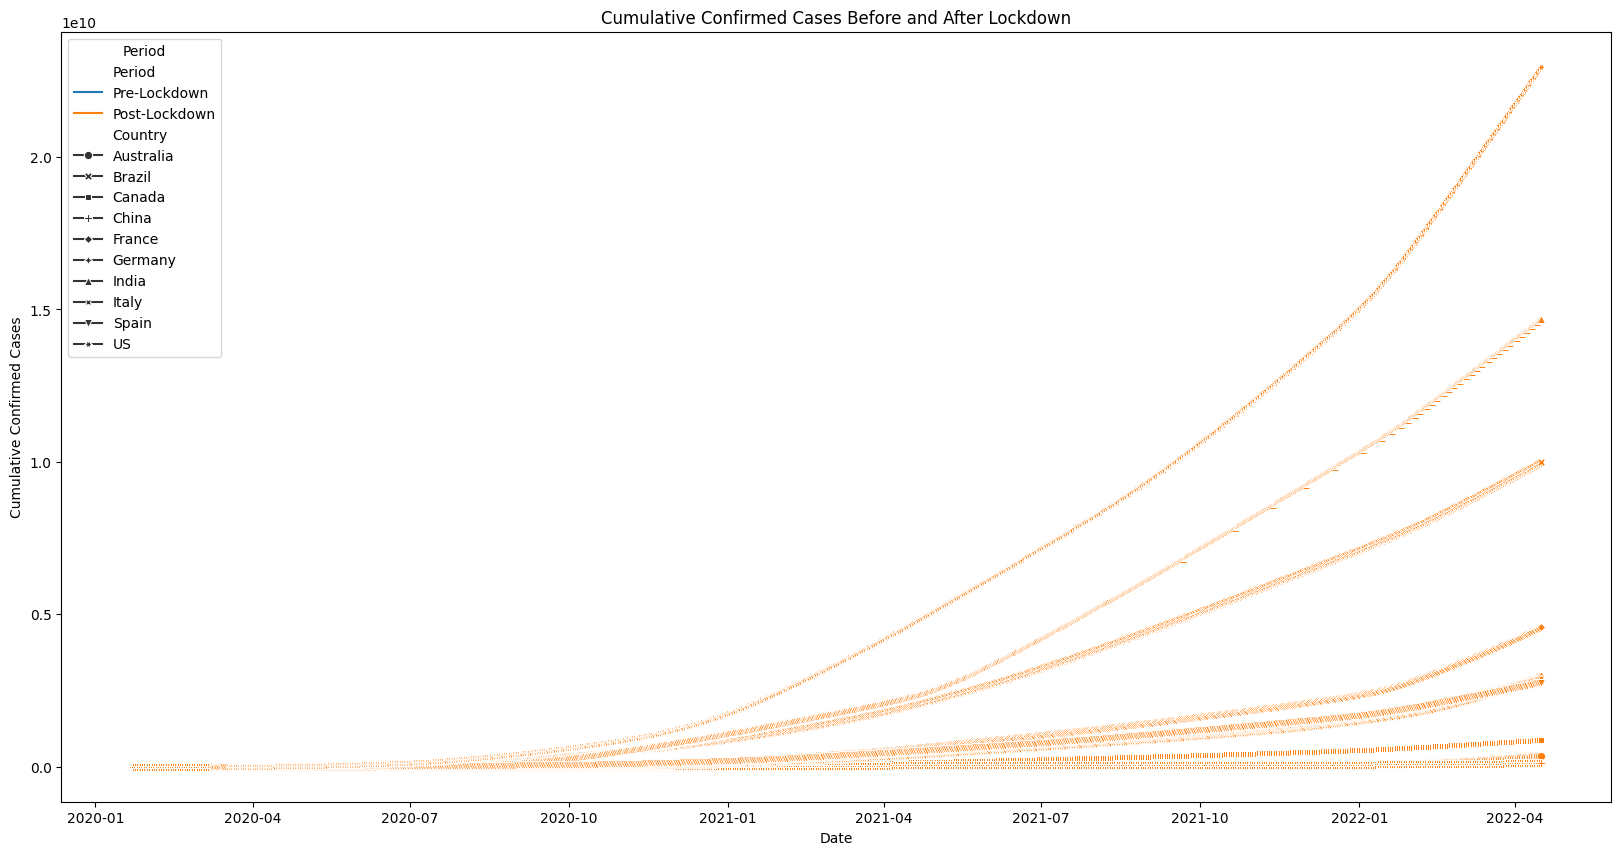

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the COVID-19 dataset
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

# Load the continent data
continent_data = {
    'Country': ['China', 'Italy', 'US', 'Spain', 'Germany', 'France', 'India', 'Brazil', 'Canada', 'Australia'],
    'Continent': ['Asia', 'Europe', 'North America', 'Europe', 'Europe', 'Europe', 'Asia', 'South America', 'North America', 'Oceania']
}

continent_df = pd.DataFrame(continent_data)

# Merge the continent data with the COVID-19 dataset
df = df.merge(continent_df, on='Country', how='left')

# Fill missing continents
continent_mapping = {
    'China': 'Asia',
    'Italy': 'Europe',
    'US': 'North America',
    'Spain': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'India': 'Asia',
    'Brazil': 'South America',
    'Canada': 'North America',
    'Australia': 'Oceania'
}

df['Continent'] = df['Country'].map(continent_mapping)

# Example lockdown start dates (you would need to replace these with actual dates)
lockdown_dates = {
    'China': '2020-01-23',
    'Italy': '2020-03-09',
    'US': '2020-03-19',
    'Spain': '2020-03-14',
    'Germany': '2020-03-22',
    'France': '2020-03-17',
    'India': '2020-03-24',
    'Brazil': '2020-03-17',
    'Canada': '2020-03-14',
    'Australia': '2020-03-22'
}

df['Lockdown_Start'] = df['Country'].map(lockdown_dates)
df['Lockdown_Start'] = pd.to_datetime(df['Lockdown_Start'])

# Calculate cumulative confirmed cases
df['Cumulative_Confirmed'] = df.groupby('Country')['Confirmed'].cumsum()

# Split data into pre-lockdown and post-lockdown
df['Period'] = df.apply(lambda row: 'Pre-Lockdown' if row['Date'] < row['Lockdown_Start'] else 'Post-Lockdown', axis=1)

# Filter out rows where lockdown start date is NaN
df = df.dropna(subset=['Lockdown_Start'])

# Plot cumulative confirmed cases before and after lockdown
plt.figure(figsize=(20, 10))

sns.lineplot(data=df, x='Date', y='Cumulative_Confirmed', hue='Period', style='Country', markers=True, dashes=False)

plt.title('Cumulative Confirmed Cases Before and After Lockdown')
plt.xlabel('Date')
plt.ylabel('Cumulative Confirmed Cases')
plt.legend(title='Period')
plt.show()

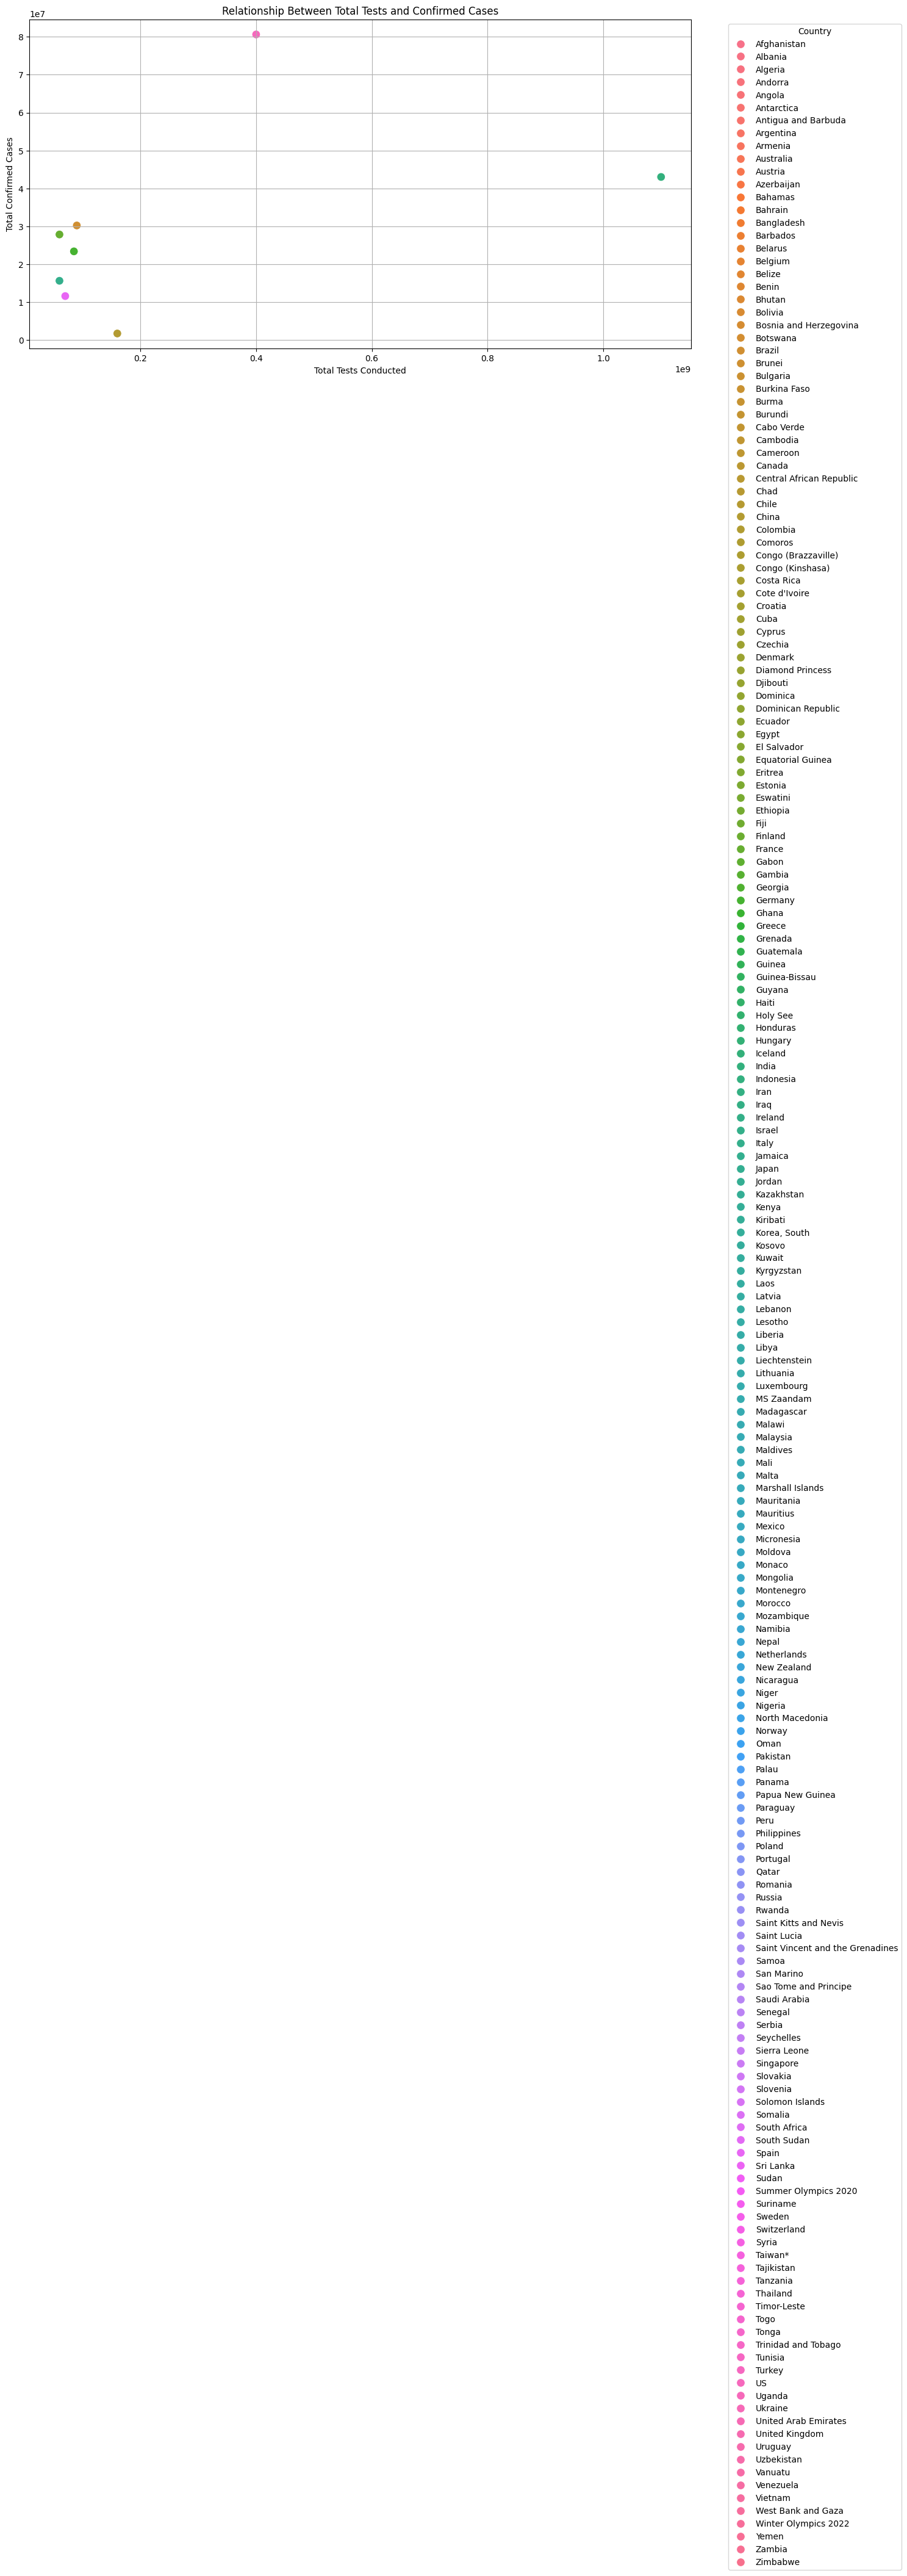

In [ ]:
tests_data = {
    'Country': ['China', 'Italy', 'US', 'Spain', 'Germany', 'France', 'India', 'Brazil'],
    'Total_Tests': [160000000, 60000000, 400000000, 70000000, 85000000, 60000000, 1100000000, 90000000]  # Example numbers
}

tests_df = pd.DataFrame(tests_data)
latest_data = df[df['Date'] == df['Date'].max()]
latest_data = latest_data.merge(tests_df, on='Country', how='left')
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Total_Tests', y='Confirmed', data=latest_data, hue='Country', s=100)

plt.title('Relationship Between Total Tests and Confirmed Cases')
plt.xlabel('Total Tests Conducted')
plt.ylabel('Total Confirmed Cases')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

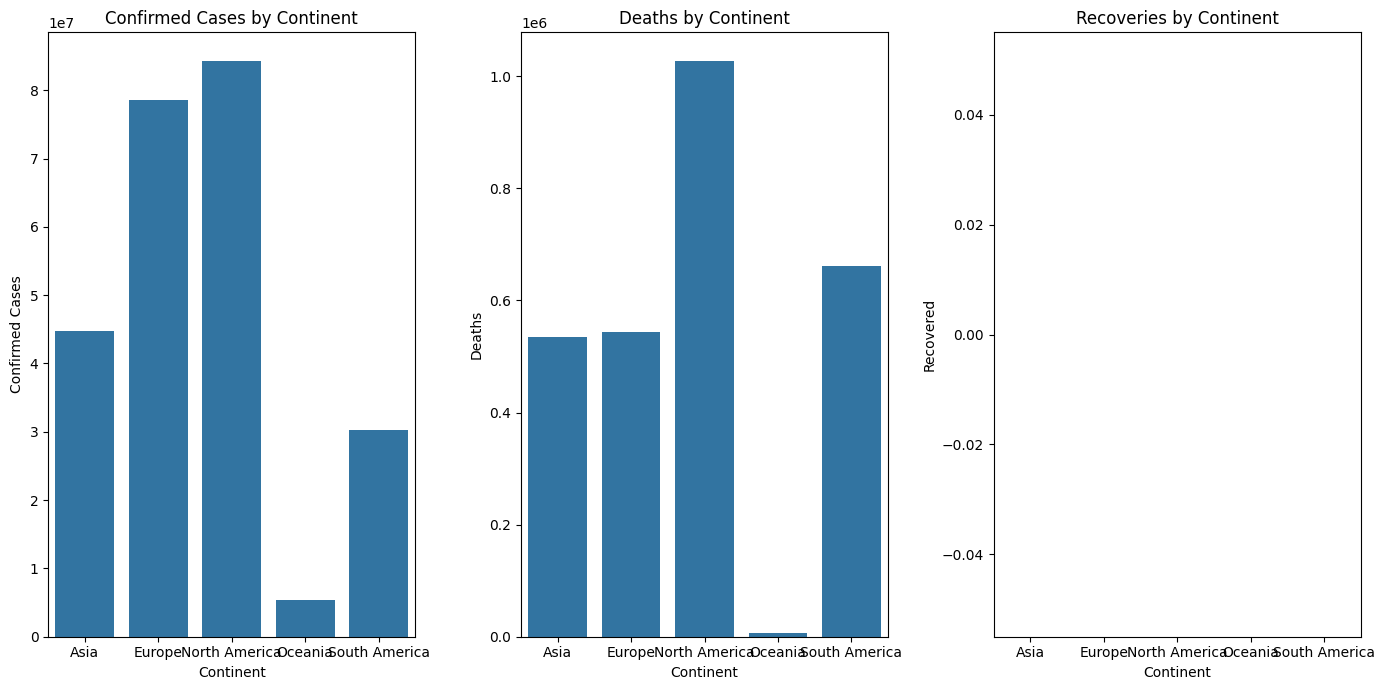

In [ ]:
# Load the continent data
continent_data = {
    'Country': ['China', 'Italy', 'US', 'Spain', 'Germany', 'France', 'India', 'Brazil', 'Canada', 'Australia'],
    'Continent': ['Asia', 'Europe', 'North America', 'Europe', 'Europe', 'Europe', 'Asia', 'South America', 'North America', 'Oceania']
}

continent_df = pd.DataFrame(continent_data)

# Merge the continent data with the COVID-19 dataset
df = df.merge(continent_df, on='Country', how='left')

# Fill missing continents
continent_mapping = {
    'China': 'Asia',
    'Italy': 'Europe',
    'US': 'North America',
    'Spain': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'India': 'Asia',
    'Brazil': 'South America',
    'Canada': 'North America',
    'Australia': 'Oceania'
}

df['Continent'] = df['Country'].map(continent_mapping)

# Summarize the latest data for each country
latest_data = df[df['Date'] == df['Date'].max()]

# Aggregate data by continent
continent_summary = latest_data.groupby('Continent')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Plot the distribution
plt.figure(figsize=(14, 7))

# Confirmed cases
plt.subplot(1, 3, 1)
sns.barplot(x='Continent', y='Confirmed', data=continent_summary)
plt.title('Confirmed Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Confirmed Cases')

# Deaths
plt.subplot(1, 3, 2)
sns.barplot(x='Continent', y='Deaths', data=continent_summary)
plt.title('Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Deaths')

# Recoveries
plt.subplot(1, 3, 3)
sns.barplot(x='Continent', y='Recovered', data=continent_summary)
plt.title('Recoveries by Continent')
plt.xlabel('Continent')
plt.ylabel('Recovered')

plt.tight_layout()
plt.show()

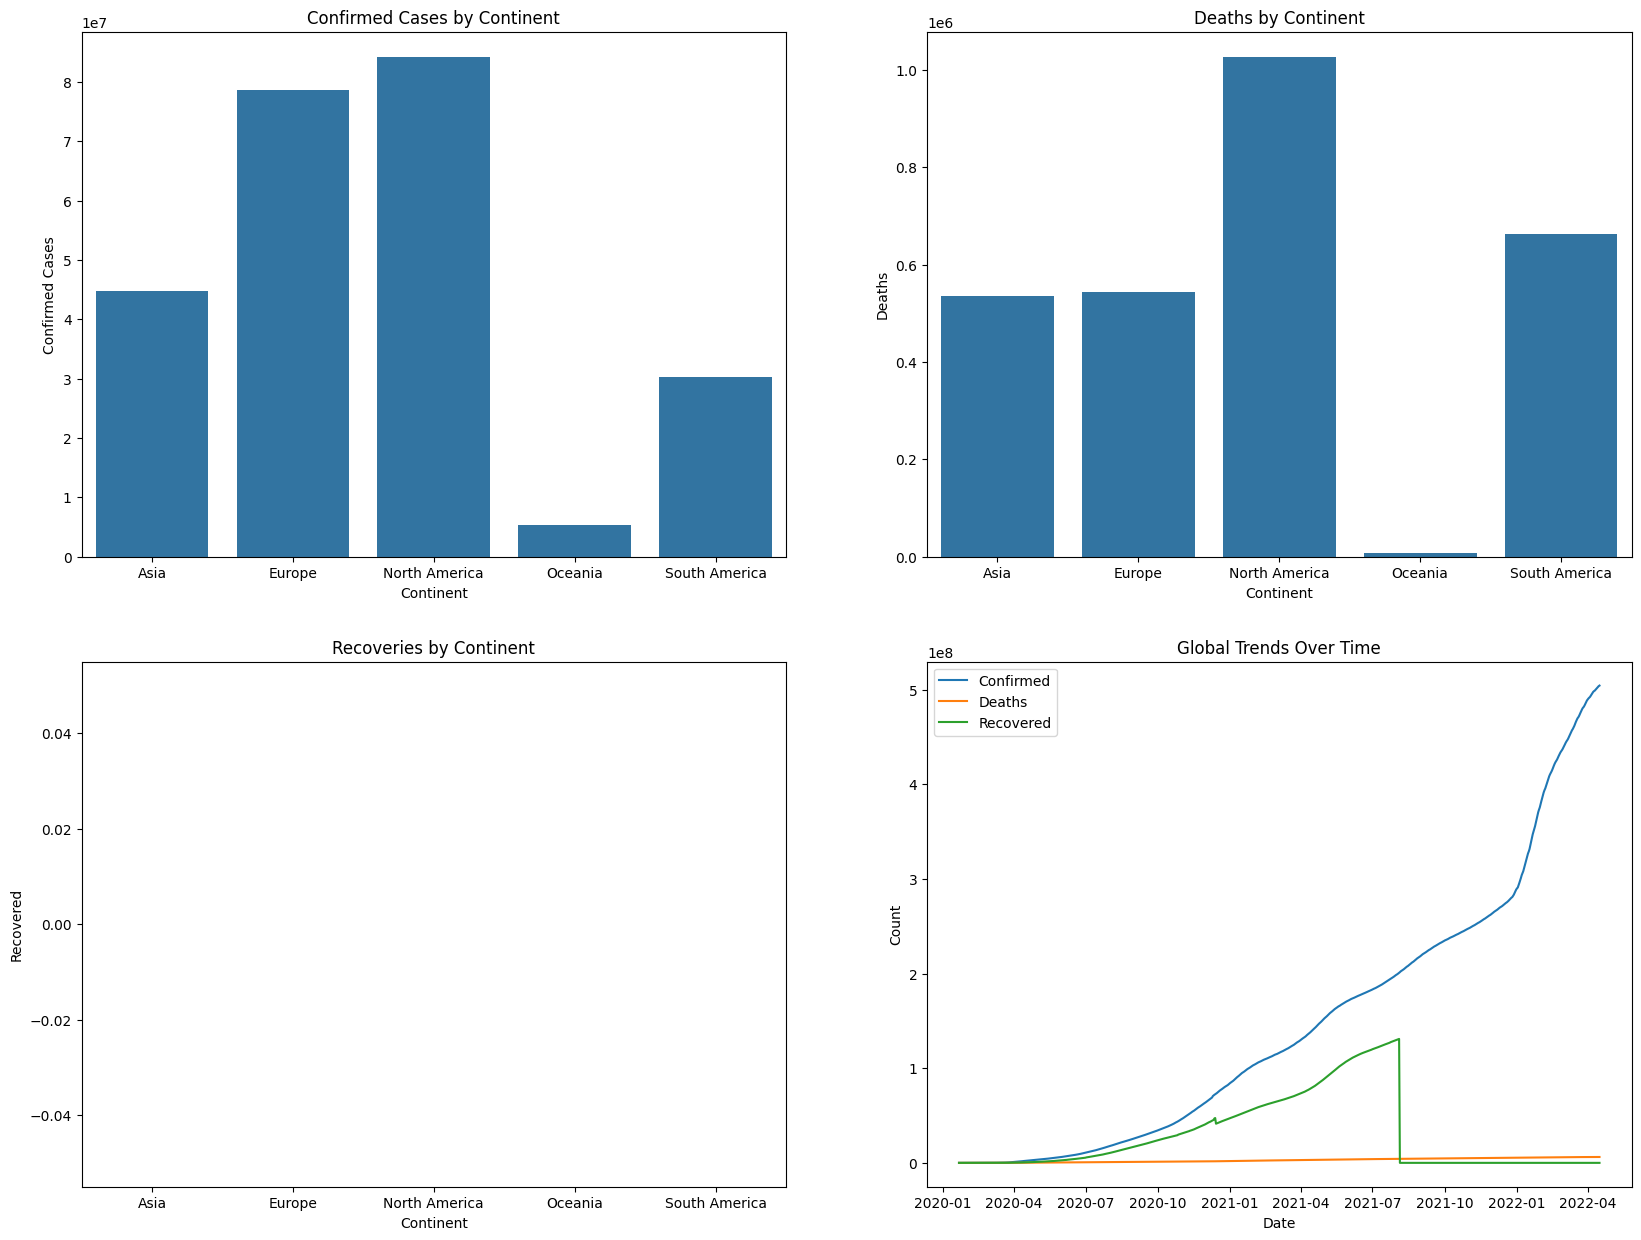

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the COVID-19 dataset
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

# Load the continent data
continent_data = {
    'Country': ['China', 'Italy', 'US', 'Spain', 'Germany', 'France', 'India', 'Brazil', 'Canada', 'Australia'],
    'Continent': ['Asia', 'Europe', 'North America', 'Europe', 'Europe', 'Europe', 'Asia', 'South America', 'North America', 'Oceania']
}

continent_df = pd.DataFrame(continent_data)

# Merge the continent data with the COVID-19 dataset
df = df.merge(continent_df, on='Country', how='left')

# Fill missing continents
continent_mapping = {
    'China': 'Asia',
    'Italy': 'Europe',
    'US': 'North America',
    'Spain': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'India': 'Asia',
    'Brazil': 'South America',
    'Canada': 'North America',
    'Australia': 'Oceania'
}

df['Continent'] = df['Country'].map(continent_mapping)

# Check for missing values and fill with 0
df[['Confirmed', 'Deaths', 'Recovered']] = df[['Confirmed', 'Deaths', 'Recovered']].fillna(0)

# Summarize the latest data for each country
latest_data = df[df['Date'] == df['Date'].max()]

# Aggregate data by continent
continent_summary = latest_data.groupby('Continent')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Aggregate global trends over time
global_trends = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Plot the distribution
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Confirmed cases by continent
sns.barplot(ax=axes[0, 0], x='Continent', y='Confirmed', data=continent_summary)
axes[0, 0].set_title('Confirmed Cases by Continent')
axes[0, 0].set_xlabel('Continent')
axes[0, 0].set_ylabel('Confirmed Cases')

# Deaths by continent
sns.barplot(ax=axes[0, 1], x='Continent', y='Deaths', data=continent_summary)
axes[0, 1].set_title('Deaths by Continent')
axes[0, 1].set_xlabel('Continent')
axes[0, 1].set_ylabel('Deaths')

# Recoveries by continent
sns.barplot(ax=axes[1, 0], x='Continent', y='Recovered', data=continent_summary)
axes[1, 0].set_title('Recoveries by Continent')
axes[1, 0].set_xlabel('Continent')
axes[1, 0].set_ylabel('Recovered')

# Global trends over time
sns.lineplot(ax=axes[1, 1], x='Date', y='Confirmed', data=global_trends, label='Confirmed')
sns.lineplot(ax=axes[1, 1], x='Date', y='Deaths', data=global_trends, label='Deaths')
sns.lineplot(ax=axes[1, 1], x='Date', y='Recovered', data=global_trends, label='Recovered')
axes[1, 1].set_title('Global Trends Over Time')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend()

plt.show()
